In [1]:
import pandas as pd
import numpy as np
import os 
import json
os.chdir('C:/Users/shjo')
from size_checker import *
from koreantextmodule.utils import *

### test 데이터셋 로드

In [31]:
# 생략 없이 출력 할 때만 실행
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# 데이터 위치 경로 설정
reset_workspace()
set_workspace('C:/Users/shjo/Desktop/AI_Hub_new/수정/050.발화유형(문어,구어,채팅)별 기계번역 병렬 말뭉치')

work space resseted to C:\Users\shjo
path exists set workspace path to C:/Users/shjo/Desktop/AI_Hub_new/수정/050.발화유형(문어,구어,채팅)별 기계번역 병렬 말뭉치


'C:/Users/shjo/Desktop/AI_Hub_new/수정/050.발화유형(문어,구어,채팅)별 기계번역 병렬 말뭉치'

In [3]:
# AI_Hub 발화유형 한영 데이터 로드
file_path = workspace('koen.json')
with open(file_path,'r',encoding="utf-8") as file:
    data = json.load(file)
raw_pd_df = pd.DataFrame(data)
raw_pd_df.head()

,id,fileName,dataSet,domain,style,isDialect,sourceText,targetText,sourceLanguage,targetLanguage
0,100010-1531-1-2,ko-en_CH_CA_ko_en_100010-1531-1-2,기계번역 병렬 말뭉치 데이터,CA,CH,n,아 그래 그럼 먹으러 고고할래?,"Oh, okay. Well, do you want to go get some?",ko,en
1,100010-1532-1-1,ko-en_CH_CA_ko_en_100010-1532-1-1,기계번역 병렬 말뭉치 데이터,CA,CH,n,요즘 코로나19로 인해서 집에서 밥해 먹거나 배달 앱으로 시켜 먹는 사람이 많은 거...,"These days, due to the Coronavirus, it seems t...",ko,en
2,100010-1532-1-2,ko-en_CH_CA_ko_en_100010-1532-1-2,기계번역 병렬 말뭉치 데이터,CA,CH,n,맞아 나도 1주일에 여러 번은 배달 앱으로 시켜 먹고 있어.,"That's right, I also order it through the deli...",ko,en
3,100010-1532-1-3,ko-en_CH_CA_ko_en_100010-1532-1-3,기계번역 병렬 말뭉치 데이터,CA,CH,n,카페나 레스토랑도 배달 앱에 요즘 입점해서 쉽게 시켜 먹을 수 있더라고.,Cafes and restaurants are registered on delive...,ko,en
4,100010-1532-1-4,ko-en_CH_CA_ko_en_100010-1532-1-4,기계번역 병렬 말뭉치 데이터,CA,CH,n,오 그럼 너는 요즘 먹은 음식이 뭐야?,"Oh, so what did you eat these days?",ko,en


In [4]:
len(pd_df)

13502

In [4]:
# 테스트를 위해 임시로 데이터 축소를 위해 랜덤 추출

import random

# 전체 데이터가 담긴 리스트
all_data = raw_pd_df.copy()

# 전체 데이터프레임의 1%를 랜덤으로 추출
percentage = 1
num_samples = int(len(all_data) * percentage / 100)
pd_df = all_data.sample(n=num_samples, random_state=42)  # random_state는 재현성을 위한 시드값
pd_df.reset_index(drop=True, inplace=True)
# 추출된 샘플 확인
# print(pd_df)

In [6]:
# pd_df

### k-means 군집분석

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt
import MeCab
# from konlpy import stopwords # KoNLPy에서 제공하는 한국어 법률 말뭉치 사용

In [23]:
# 영어 문장 리스트
sentences = list(pd_df.targetText)

In [24]:
# 형태소 분석 및 명사 추출(Okt 사용)
okt = Okt()
def okt_noun_extractor(sentence):
    nouns = okt.nouns(sentence)
    return ' '.join(nouns)

tokenized_sentences = [okt_noun_extractor(sentence) for sentence in sentences]

In [33]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_sentences)

# k-means 클러스터링
num_clusters = 2  # 예시로 3개의 클러스터를 형성
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=42)
kmeans.fit(X)

# 각 문장의 클러스터 할당
cluster_assignments = kmeans.labels_

#### 한국어_Okt

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt

# 한국어 형태소 분석기 설정 (Okt)
okt = Okt()

# 입력 데이터: 한국어 문장 리스트
sentences = list(pd_df.sourceText)

# 형태소 분석 및 명사 추출
tokenized_sentences = [' '.join(okt.nouns(sentence)) for sentence in sentences]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_sentences)

# k-means 클러스터링
num_clusters = 3  # 예시로 3개의 클러스터를 형성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# 각 문장의 클러스터 할당
cluster_assignments = kmeans.labels_

In [8]:
# 문장 + 클러스터 데이터프레임 생성
df = pd.DataFrame({'Sentence': sentences, 'Cluster': cluster_assignments})

# 결과 출력
# print(df)

#### 한국어_Mecab

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import MeCab

# Mecab 형태소 분석기 설정
mecab = MeCab.Tagger()

# 입력 데이터: 한국어 문장 리스트
sentences = list(pd_df.sourceText)

# 형태소 분석 및 명사 추출
def mecab_noun_extractor(sentence):
    nouns = []
    parsed_sentence = mecab.parse(sentence)
    for word_info in parsed_sentence.split("\n"):
        if "NNG" in word_info or "NNP" in word_info:
            nouns.append(word_info.split("\t")[0])
    return ' '.join(nouns)

tokenized_sentences = [mecab_noun_extractor(sentence) for sentence in sentences]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_sentences)

# k-means 클러스터링
num_clusters = 3  # 예시로 3개의 클러스터를 형성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# 각 문장의 클러스터 할당
cluster_assignments = kmeans.labels_

# 결과 출력
# for cluster_num in range(num_clusters):
#     print(f"Cluster {cluster_num + 1}:")
#     cluster_sentences = [sentences[i] for i, label in enumerate(cluster_assignments) if label == cluster_num]
#     print("\n".join(cluster_sentences))
#     print("\n")

In [12]:
# 문장 + 클러스터 데이터프레임 생성
df = pd.DataFrame({'Sentence': sentences, 'Cluster': cluster_assignments})

# 결과 출력
# print(df)

In [13]:
df[df.Cluster== 2]

,Sentence,Cluster
2,지루할 때는 영화 한편 보는 것이 해피한 것 같다.,2
69,갑자기 영화는 왜 물어보는 거야?,2
134,여름에 유행하는 공포영화가 나는 무서워서 너무 싫다.,2


#### 영어_nltk

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shjo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# 입력 데이터: 영어 문장 리스트
sentences = list(pd_df.targetText)


# 영어 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_sentences = [' '.join([word.lower() for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]) for sentence in sentences]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_sentences)

# k-means 클러스터링
num_clusters = 3  # 예시로 3개의 클러스터를 형성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# 각 문장의 클러스터 할당
cluster_assignments = kmeans.labels_

# 결과 출력
# for cluster_num in range(num_clusters):
#     print(f"Cluster {cluster_num + 1}:")
#     cluster_sentences = [sentences[i] for i, label in enumerate(cluster_assignments) if label == cluster_num]
#     print("\n".join(cluster_sentences))
#     print("\n")

In [16]:
# 문장 + 클러스터 데이터프레임 생성
df = pd.DataFrame({'Sentence': sentences,'Sentence_ko': list(pd_df.sourceText),'Cluster': cluster_assignments})

# 결과 출력
# print(df.head())

In [17]:
df[df.Cluster== 1]

,Sentence,Sentence_ko,Cluster
1,I like your Pompitz's hair. Are you using only...,자기네 폼피츠 모발이 좋던데 샴푸만 쓰니?,1
9,I didn't know you liked mint chocolate. I real...,너 민초단이었어 몰랐네 나는 완전 반민초단임.,1
17,"Yeah, it's been a while. Let's go eat like a h...",그래 오래간만에 애슐리 퀸즈 가서 배 터지게 먹자.,1
18,"That's right. When I was a job seeker, I was l...",맞아 취준생일 땐 언제 취업하려나 목을 빼고 기다렸는데 취업하고 나니 마상 받는 일...,1
28,It looks like most Earth science questions hav...,이번에 지구과학 문제 우주 파트에서 거의 다 나왔나 보네.,1
44,Rotavirus got its name from the Latin word 'Ro...,로타바이러스는 전자현미경으로 관찰하면 테두리에 짧은 바퀴살을 갖는 수레바퀴처럼 생겼...,1
48,How much syrup would you like?,시럽은 어느 정도 넣어 드릴까요?,1
85,"Laser toning? What is that, is it something li...",레이저 토닝 그게 뭐야 박피 같은 거야?,1
89,"Wow, I finally got to appreciate why I talked ...",와 드디어 내가 널 설득시킨 진가가 나타나는구나?,1
128,"I got one for my dad, LANEIGE Homme set.",라네즈 옴므 세트 아빠 주려고 하나 겟했다.,1


### 계층적 군집분석

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from konlpy.tag import Okt

# 한국어 형태소 분석기 설정 (Okt)
okt = Okt()

# 입력 데이터: 한국어 문장 리스트
sentences = list(pd_df.sourceText)

# 형태소 분석 및 명사 추출
tokenized_sentences = [' '.join(okt.nouns(sentence)) for sentence in sentences]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_sentences)

# 계층적 군집분석
num_clusters = 4  # 예시로 3개의 클러스터를 형성
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_cluster_assignments = agg_clustering.fit_predict(X.toarray())

# 결과 출력
# for cluster_num in range(num_clusters):
#     print(f"Cluster {cluster_num + 1}:")
#     cluster_sentences = [sentences[i] for i, label in enumerate(agg_cluster_assignments) if label == cluster_num]
#     print("\n".join(cluster_sentences))
#     print("\n")

In [19]:
df = pd.DataFrame({'Sentence': sentences,'Cluster': agg_cluster_assignments})

# 결과 출력
# print(df.head())

In [20]:
df[df.Cluster== 0]

,Sentence,Cluster
7,그래 그런 거 같아 요즘은 장르에 관계없이 보이스가 좋고 실력들이 좋아서 힐링 되는...,0
8,이번 겨울은 극한의 추위가 예상된다.,0
28,이번에 지구과학 문제 우주 파트에서 거의 다 나왔나 보네.,0
37,지금도 공 기기로 유튜브를 시청하면서 설문조사를 하고 있거든.,0
39,이러한 격차는 정보화 기기에 대한 스트레스로 이어질 수 있어 새로운 사회문제가 될 ...,0
52,불에 달군 쇠라니? 설마 쇠 파이프로 올리는 건 아니겠지?,0
61,너는 언제까지 지금의 잡을 유지할 거니?,0
80,요즘에 스위치 프로그램들이 많아서 갤럭시와 아이폰 간에 이동하는데 큰 문제는 안 되...,0
81,뜨아파라니 설마 너 겨울에 패셔요 코셔요?,0
86,얘들아 이번에 수시 원서 사이트에 들어가서 원서 마감했니?,0


In [21]:
len(df)

135

In [35]:
# 다시 제한 설정
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 50)

In [39]:
13275+113+114

13502

In [22]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 계층적 군집분석에서 거리 행렬 계산
linkage_matrix = linkage(X.toarray(), 'ward')

# 덴드로그램 그리기
# dendrogram(linkage_matrix, orientation="top", labels=sentences, distance_sort='descending', show_leaf_counts=True)
# plt.title('Dendrogram')
# plt.xlabel('Sentence')
# plt.ylabel('Distance')
# plt.show()

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# linkage 함수를 사용하여 클러스터 간의 거리 행렬 계산
Z = linkage(X.toarray(), method='ward')  # X는 TF-IDF 행렬

# 덴드로그램 생성
# plt.figure(figsize=(15, 8))
# dendrogram(Z)
# plt.show()

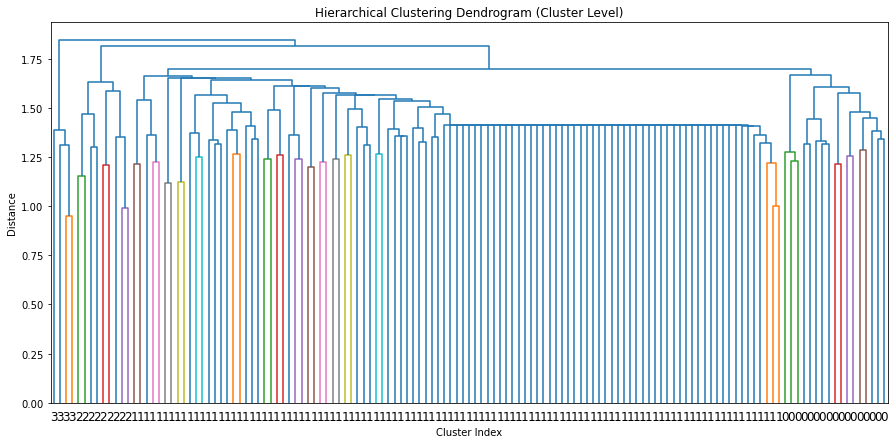

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 계층적 군집분석
linkage_matrix = linkage(X.toarray(), method='ward')

# 클러스터 단위로 덴드로그램 그리기
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, labels=agg_cluster_assignments, leaf_rotation=0, leaf_font_size=12, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Cluster Level)')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

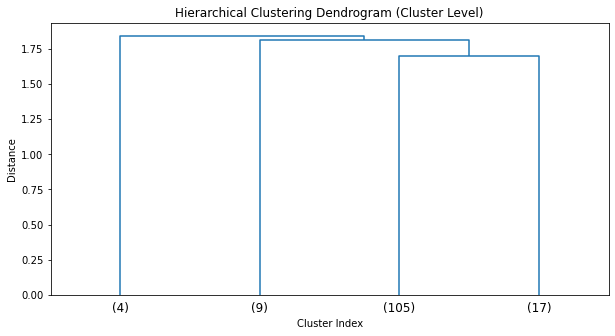

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 계층적 군집분석
linkage_matrix = linkage(X.toarray(), method='ward')

# 클러스터 단위로 덴드로그램 그리기
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=agg_cluster_assignments, leaf_rotation=0, leaf_font_size=12, orientation='top', truncate_mode='lastp', p=len(np.unique(agg_cluster_assignments)))
plt.title('Hierarchical Clustering Dendrogram (Cluster Level)')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

In [49]:
len(np.unique(agg_cluster_assignments))

4

In [51]:
agg_cluster_assignments

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1], dtype=int64)

In [60]:
print(len(agg_cluster_assignments))

135


In [65]:
agg_cluster_assignments[0]

1

### GMM 군집분석

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 한국어 형태소 분석기 설정 (Okt)
okt = Okt()

# 입력 데이터: 한국어 문장 리스트
sentences = list(pd_df.sourceText)

# 형태소 분석 및 명사 추출
tokenized_sentences = [' '.join(okt.nouns(sentence)) for sentence in sentences]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_sentences)

# GMM 모델 학습
num_clusters = 3  # 클러스터 개수 지정
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(X.toarray())

# 각 데이터 포인트에 대한 클러스터 예측
cluster_assignments = gmm.predict(X.toarray())

# 결과 출력
# for cluster_num in range(num_clusters):
#     print(f"Cluster {cluster_num + 1}:")
#     cluster_sentences = [sentences[i] for i, label in enumerate(cluster_assignments) if label == cluster_num]
#     print("\n".join(cluster_sentences))
#     print("\n")

In [26]:
df = pd.DataFrame({'Sentence': sentences,'Cluster': agg_cluster_assignments})

# 결과 출력
# print(df.head())

In [27]:
df[df.Cluster== 0]

,Sentence,Cluster
7,그래 그런 거 같아 요즘은 장르에 관계없이 보이스가 좋고 실력들이 좋아서 힐링 되는...,0
8,이번 겨울은 극한의 추위가 예상된다.,0
28,이번에 지구과학 문제 우주 파트에서 거의 다 나왔나 보네.,0
37,지금도 공 기기로 유튜브를 시청하면서 설문조사를 하고 있거든.,0
39,이러한 격차는 정보화 기기에 대한 스트레스로 이어질 수 있어 새로운 사회문제가 될 ...,0
52,불에 달군 쇠라니? 설마 쇠 파이프로 올리는 건 아니겠지?,0
61,너는 언제까지 지금의 잡을 유지할 거니?,0
80,요즘에 스위치 프로그램들이 많아서 갤럭시와 아이폰 간에 이동하는데 큰 문제는 안 되...,0
81,뜨아파라니 설마 너 겨울에 패셔요 코셔요?,0
86,얘들아 이번에 수시 원서 사이트에 들어가서 원서 마감했니?,0


In [12]:
df[df.Cluster== 1]

,Sentence,Cluster
0,그녀의 노랫소리는 너무 가늘어서 잘 들리지 않았다.,1
1,자기네 폼피츠 모발이 좋던데 샴푸만 쓰니?,1
2,지루할 때는 영화 한편 보는 것이 해피한 것 같다.,1
3,"나 커뮤니케이션의 이해, 직업학, 교육학 들었어.",1
4,집안의 나쁜 기운을 없애기 위해 내일 고사를 지낸다고 한다.,1
...,...,...
128,라네즈 옴므 세트 아빠 주려고 하나 겟했다.,1
130,"반면, 독감은 인플루엔자 바이러스가 원인이 되어 나타나는 질환으로 에이, 비, 씨 ...",1
131,어 인터넷으로 구두 쇼핑했어 아이쇼핑만 하려다 급 쇼핑하게 되었어.,1
132,야 그러면 7시에 하자 몰라도 됨.,1


In [13]:
df[df.Cluster== 2]

,Sentence,Cluster
25,정말 내가 하고 싶었던 건 메디칼 쪽이었는데 학비가 너무 비싸서 못했지,2
36,최근에 개발된 기술이 탑재되어 있다고 들었는데 팩트니?,2
51,메이크업할 때 팩트는 안하고 선크림만 발라.,2
53,역시 메이크업의 끝판왕은 클리오 더블커버킬 팩트지,2
74,그러게 폴더블 기술이 이제는 극강으로 좋더라고 아직 못 샀어.,2
77,최근 미 연방센서스국 조사에 따르면 미국내 독신 인구는 8600만명에 이른다.,2
102,나는 개인적으로 롤러블폰이 정말 이노베이션 한 기술이라고 생각해.,2
103,앞으로 이러한 기술을 이제는 생활의 일부분이 되고 있으니 적응해야 한다.,2
123,나도 이제 콜드브루 마시지 말고 시즌 메뉴 한번 마셔볼까?,2


### DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import pandas as pd

# 한국어 형태소 분석기 설정 (Okt)
okt = Okt()

# 입력 데이터: 한국어 문장 리스트
sentences = list(pd_df.sourceText)

# 형태소 분석 및 명사 추출
tokenized_sentences = [' '.join(okt.nouns(sentence)) for sentence in sentences]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_sentences)

# DBSCAN 모델 학습
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: 이웃 포인트 간의 최대 거리, min_samples: 클러스터에 포함되어야 하는 최소 포인트 수
dbscan_labels = dbscan.fit_predict(X)

# 결과를 데이터프레임에 추가
df = pd.DataFrame({'Sentence': sentences, 'Cluster': dbscan_labels})

# 결과 출력
# print(df)

In [15]:
df.Cluster.nunique()

1

In [29]:
# df[df.Cluster==-1]

In [30]:
# df